In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
train=pd.read_csv("/home/rahul/machine learning/ml/train.csv")
test=pd.read_csv("/home/rahul/machine learning/ml/test.csv")

In [96]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [97]:
train.shape

(891, 12)

In [98]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [100]:
train.shape

(891, 12)

In [101]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [102]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
def barchart(feature):
    survived=train[train["Survived"]==1][feature].value_counts()
    dead=train[train["Survived"]==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=["survived",'dead']
    df.plot(kind="bar",stacked=True)
    plt.show()

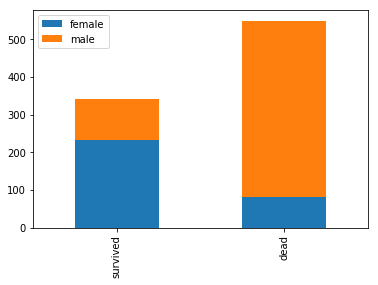

In [104]:
barchart("Sex")

In [105]:

train=train.drop(["Ticket"],axis=1)

In [106]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [107]:
train.shape

(891, 11)

In [108]:

test=test.drop(["Ticket"],axis=1)

In [109]:
test.shape

(418, 10)

In [110]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

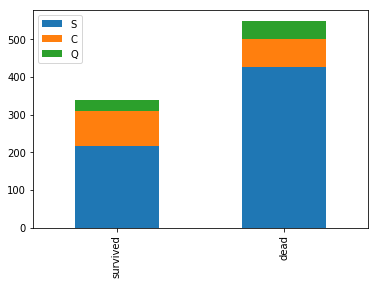

In [111]:
barchart("Embarked")

In [112]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


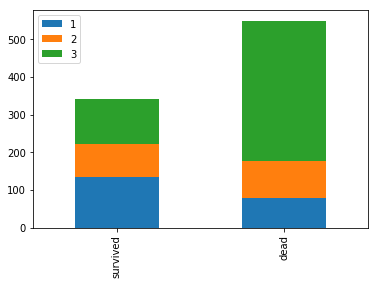

In [113]:
barchart("Pclass")

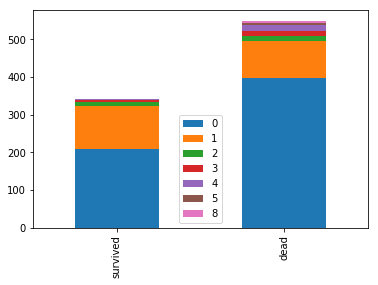

In [114]:
barchart("SibSp")

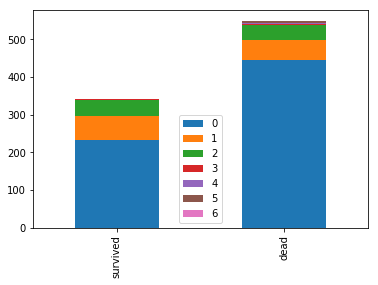

In [115]:
barchart("Parch")

In [116]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


In [117]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [118]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [120]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [121]:
test_train=[train,test]

In [122]:
age_map={"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
train["Title"]=train["Name"].str.extract('([A-Za-z]+)\.',expand=False).map(age_map)
test["Title"]=test["Name"].str.extract('([A-Za-z]+)\.',expand=False).map(age_map)

In [123]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,2


In [124]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [125]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

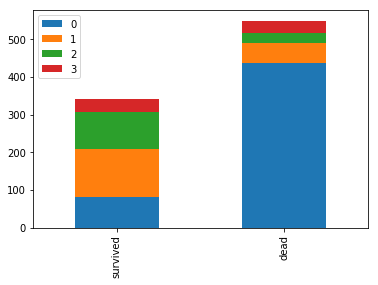

In [126]:
barchart("Title")

In [127]:
test=test.drop("Name",axis=1)
train=train.drop("Name",axis=1)

In [128]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,12.2875,NaN,S,2


In [129]:
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)

In [130]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,12.2875,NaN,S,2


In [131]:
gender_map={"male":0,"female":1}
test["Sex"]=test["Sex"].map(gender_map)
train["Sex"]=train["Sex"].map(gender_map)

In [132]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,12.2875,NaN,S,2


In [133]:

train.loc[ train['Age'] <= 16, 'Age'] = 0,
train.loc[(train['Age'] > 16) & (train['Age'] <= 26), 'Age'] = 1,
train.loc[(train['Age'] > 26) & (train['Age'] <= 36), 'Age'] = 2,
train.loc[(train['Age'] > 36) & (train['Age'] <= 62), 'Age'] = 3,
train.loc[ train['Age'] > 62, 'Age'] = 4
test.loc[ test['Age'] <= 16, 'Age'] = 0,
test.loc[(test['Age'] > 16) & (test['Age'] <= 26), 'Age'] = 1,
test.loc[(test['Age'] > 26) & (test['Age'] <= 36), 'Age'] = 2,
test.loc[(test['Age'] > 36) & (test['Age'] <= 62), 'Age'] = 3,
test.loc[ test['Age'] > 62, 'Age'] = 4
    

In [134]:

train.loc[ train['Fare'] <= 17, 'Fare'] = 0,
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1,
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2,
train.loc[ train['Fare'] > 100, 'Fare'] = 3
test.loc[ test['Fare'] <= 17, 'Fare'] = 0,
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1,
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2,
test.loc[ test['Fare'] > 100, 'Fare'] = 3
    

In [135]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,2.0,C85,C,2
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,2.0,C123,S,2
4,5,0,3,0,2.0,0,0,0.0,NaN,S,0


In [136]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [137]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train['FamilySize'] = train['FamilySize'].map(family_mapping)
test['FamilySize']=test['FamilySize'].map(family_mapping)

In [138]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0,0.4
1,2,1,1,1,3.0,1,0,2.0,C85,C,2,0.4
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1,0.0
3,4,1,1,1,2.0,1,0,2.0,C123,S,2,0.4
4,5,0,3,0,2.0,0,0,0.0,NaN,S,0,0.0


In [139]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [140]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Title            0
FamilySize       0
dtype: int64

In [141]:
train['Cabin']=train["Cabin"].str[:1]
test['Cabin']=test["Cabin"].str[:1]

In [142]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin']=test["Cabin"].map(cabin_mapping)

In [143]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0,0.4
1,2,1,1,1,3.0,1,0,2.0,0.8,C,2,0.4
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1,0.0
3,4,1,1,1,2.0,1,0,2.0,0.8,S,2,0.4
4,5,0,3,0,2.0,0,0,0.0,NaN,S,0,0.0


In [144]:
train["Embarked"].fillna("S",inplace=True)

In [145]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [146]:
#embark_map={"S":0,"C":1,"Q":2}
#test["Embarked"]=test["Embarked"].map(embark_map)
#train["Embarked"]=train["Embarked"].map(embark_map)

In [147]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,91.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.763158,0.447368,0.392344,0.775120,0.918681,0.732057,0.335885
std,120.810458,0.841838,0.481622,0.971479,0.896760,0.981429,0.999834,0.557756,0.972019,0.607629
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,3.000000,1.000000,0.000000,2.000000,1.200000,1.000000,0.400000
max,1309.000000,3.000000,1.000000,4.000000,8.000000,9.000000,3.000000,2.400000,3.000000,4.000000


In [148]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [149]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [150]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [151]:
dummy=pd.get_dummies(train[['Embarked']])

In [152]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,2.0,S,0,0.4
1,2,1,1,1,3.0,1,0,2.0,0.8,C,2,0.4
2,3,1,3,1,1.0,0,0,0.0,2.0,S,1,0.0
3,4,1,1,1,2.0,1,0,2.0,0.8,S,2,0.4
4,5,0,3,0,2.0,0,0,0.0,2.0,S,0,0.0


In [153]:
train=pd.concat([train,dummy],axis=1)

In [154]:
train=train.drop("Embarked",axis=1)

In [155]:
dummytest=pd.get_dummies(test[["Embarked"]])

In [156]:
test=pd.concat([test,dummytest],axis=1)

In [157]:
test=test.drop("Embarked",axis=1)

In [158]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,2.0,0,0,0.0,2.0,0,0.0,0,1,0
1,893,3,1,3.0,1,0,0.0,2.0,2,0.4,0,0,1
2,894,2,0,3.0,0,0,0.0,2.0,0,0.0,0,1,0
3,895,3,0,2.0,0,0,0.0,2.0,0,0.0,0,0,1
4,896,3,1,1.0,1,1,0.0,2.0,2,0.8,0,0,1


In [159]:
#dropcol=["Embarked_C","Embarked_Q","Embarked_S","Cabin","Title"]

In [160]:
#train_col=train[dropcol]

In [161]:
#train_col.head()

In [162]:
#train=train.drop(dropcol,axis=1)

In [163]:
train=train.drop("PassengerId",axis=1)

In [164]:
target = train['Survived']
train=train.drop("Survived",axis=1)

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
labels=train.columns[0:]

In [167]:
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)

In [168]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1.0,1,0,0.0,2.0,0,0.4,0,0,1
1,1,1,3.0,1,0,2.0,0.8,2,0.4,1,0,0
2,3,1,1.0,0,0,0.0,2.0,1,0.0,0,0,1
3,1,1,2.0,1,0,2.0,0.8,2,0.4,0,0,1
4,3,0,2.0,0,0,0.0,2.0,0,0.0,0,0,1


In [169]:
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)

In [170]:
forest.fit(train,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [171]:
importances = forest.feature_importances_

In [172]:
indices = np.argsort(importances)[::-1]

In [173]:
for f in range(train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,labels[f],importances[indices[f]]))


 1) Pclass                         0.218960
 2) Sex                            0.195619
 3) Age                            0.120608
 4) SibSp                          0.104196
 5) Parch                          0.080300
 6) Fare                           0.075225
 7) Cabin                          0.075096
 8) Title                          0.044993
 9) FamilySize                     0.034072
10) Embarked_C                     0.021067
11) Embarked_Q                     0.018586
12) Embarked_S                     0.011279


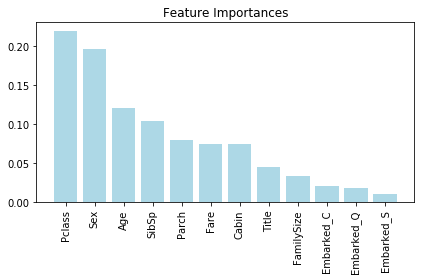

In [174]:
plt.title('Feature Importances')
plt.bar(range(train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(train.shape[1]),labels, rotation=90)
plt.xlim([-1, train.shape[1]])
plt.tight_layout()
plt.show()

In [175]:
from matplotlib.colors import ListedColormap

In [176]:
"""def plot_decison_region(X,y,classifier,resolution=0.02):
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)"""

"def plot_decison_region(X,y,classifier,resolution=0.02):\n   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')\n    cmap = ListedColormap(colors[:len(np.unique(y))])\n    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1\n    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1\n    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),\n    np.arange(x2_min, x2_max, resolution))\n    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)\n    Z = Z.reshape(xx1.shape)\n    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)\n    plt.xlim(xx1.min(), xx1.max())\n    plt.ylim(xx2.min(), xx2.max())\n    for idx, cl in enumerate(np.unique(y)):\n        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)"

In [177]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(train)
lr.fit(X_train_pca, target)
plot_decison_region(X_train_pca, target, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()"""

"from sklearn.linear_model import LogisticRegression\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=2)\nlr = LogisticRegression()\nX_train_pca = pca.fit_transform(train)\nlr.fit(X_train_pca, target)\nplot_decison_region(X_train_pca, target, classifier=lr)\nplt.xlabel('PC1')\nplt.ylabel('PC2')\nplt.legend(loc='lower left')\nplt.show()"

In [291]:
#train=train.drop("PassengerId",axis=1)

In [74]:
#train_data = train.drop('Survived', axis=1)
#target = train['Survived']

In [293]:
#from sklearn.linear_model import Perceptron

In [294]:
#ppn=Perceptron(n_iter=50,eta0=0.1,random_state=0)
#ppn.fit(train_data,target)

/home/rahul/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [295]:
#prediction=ppn.predict(train_data)

In [296]:
#from sklearn.metrics import accuracy_score

In [297]:
#print("Accuracy:",accuracy_score(target,prediction))

Accuracy: 0.791245791246


In [298]:
#from sklearn.linear_model import LogisticRegression

In [299]:
#ppn=LogisticRegression()

In [300]:
#ppn.fit(train_data,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [301]:
#prediction=ppn.predict(train_data)

In [302]:
#print("Accuracy:",accuracy_score(target,prediction))

Accuracy: 0.804713804714


In [303]:
#from sklearn.svm import SVC

In [304]:
#ppn=SVC()

In [305]:
#ppn=SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)

In [306]:
#ppn.fit(train_data,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [307]:
#prediction=ppn.predict(train_data)

In [308]:
#print("Accuracy:",accuracy_score(target,prediction))

Accuracy: 0.864197530864


In [311]:
#test_data=test.drop("PassengerId",axis=1)

In [312]:
#rediction=ppn.predict(test_data)

In [313]:
#from sklearn.tree import DecisionTreeClassifier

In [314]:
#ppn=DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

In [315]:
#ppn.fit(train_data,target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [316]:
#prediction=ppn.predict(train_data)

In [317]:
#print("Accuracy:",accuracy_score(target,prediction))

Accuracy: 0.810325476992


In [318]:
#from sklearn.ensemble import RandomForestClassifier

In [319]:
#ppn=RandomForestClassifier(criterion='entropy',n_estimators=20,random_state=1,n_jobs=2)

In [320]:
#ppn.fit(train_data,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [321]:
#prediction=ppn.predict(train_data)

In [322]:
#print("Accuracy:",accuracy_score(target,prediction))

Accuracy: 0.861952861953


In [324]:
##prediction=ppn.predict(test_data)

In [112]:
#submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": prediction})

#submission.to_csv('submission.csv', index=False)